In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [2]:
df = pd.read_csv('../data/clean_data/clean_data.csv')

df.head()

,duration_ms,loudness,tempo,valence,acousticness,danceability,energy
0,0.403695,0.451467,0.178779,0.963,0.732,0.819,0.341
1,0.483304,0.557378,0.412301,0.165,0.967,0.275,0.309
2,0.366304,0.530943,0.421576,0.253,0.957,0.418,0.193
3,0.983312,0.449265,0.529827,0.196,0.579,0.697,0.346
4,0.346890,0.514234,0.210284,0.406,0.996,0.518,0.203


# KMeans algo

In [3]:
from sklearn.cluster import KMeans

In [4]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

len(inertias)

10

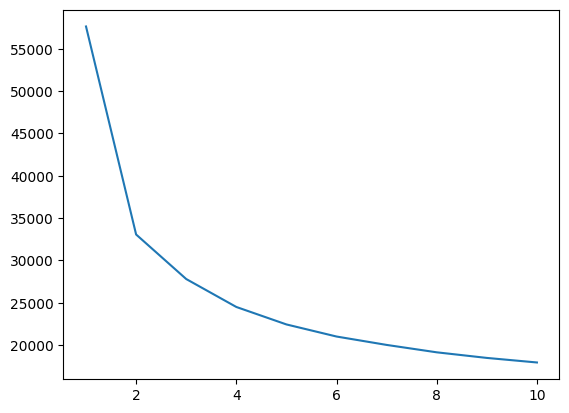

In [5]:
sns.lineplot(x=list(range(1, 11)), y=inertias);

<font color='red'>The optimal number of clusters appears to be 4</font>

## Loop for best KMeans solution

### K-means++ initialization

In [6]:
best_solution = None
time_partials = []
scores = []

start_total_time = time.time()
for _ in range(50):
    start_partial_time = time.time()
    kmeans = KMeans(4, init='k-means++', n_init=1, max_iter=75)
    kmeans.fit(df)
    partial_time = time.time() - start_partial_time
    time_partials.append(partial_time)
    scores.append(kmeans.inertia_)

    if best_solution is None or kmeans.inertia_ < best_solution.inertia_:
        best_solution = kmeans

total_time = time.time() - start_total_time

In [7]:
print(f'Best inertia: {best_solution.inertia_:.2f}')
print(f'Average inertia: {np.mean(scores):.2f}')
print(f'Std inertia: {np.std(scores):.2f}')
print('-'*50)
print(f'Total time:     {total_time:.2f} seconds.')
print(f'Average time per loop:    {np.mean(time_partials):.2f} seconds.')
print(f'Std time per loop:    {np.std(time_partials):.2f} seconds.')

Best inertia: 24506.52
Average inertia: 24506.76
Std inertia: 0.11
--------------------------------------------------
Total time:     6.12 seconds.
Average time per loop:    0.12 seconds.
Std time per loop:    0.01 seconds.


In [8]:
df_kmeans_pp = df.copy()

df_kmeans_pp['labels'] = best_solution.predict(df_kmeans_pp)

In [9]:
df_kmeans_pp.labels.value_counts(normalize=True)

labels
3    0.272868
0    0.260693
2    0.241937
1    0.224502
Name: proportion, dtype: float64

In [10]:
best_solution.cluster_centers_

array([[0.40123645, 0.46631013, 0.51742167, 0.70974094, 0.78890153,
        0.60297059, 0.38546503],
       [0.5693395 , 0.61023813, 0.55559291, 0.36617624, 0.12735113,
        0.51176878, 0.67674371],
       [0.48156959, 0.33966241, 0.43694748, 0.27543574, 0.86066963,
        0.41195281, 0.20622863],
       [0.50769913, 0.59078998, 0.53620261, 0.77215188, 0.17187666,
        0.66374367, 0.68813925]])

### Random initialization

In [20]:
best_solution = None
time_partials = []
scores = []

start_total_time = time.time()
for _ in range(50):
    start_partial_time = time.time()
    kmeans = KMeans(4, init='random', n_init=1, max_iter=75)
    kmeans.fit(df)
    partial_time = time.time() - start_partial_time
    time_partials.append(partial_time)
    scores.append(kmeans.inertia_)

    if best_solution is None or kmeans.inertia_ < best_solution.inertia_:
        best_solution = kmeans

total_time = time.time() - start_total_time

In [21]:
print(f'Best inertia: {best_solution.inertia_:.2f}')
print(f'Average inertia: {np.mean(scores):.2f}')
print(f'Std inertia: {np.std(scores):.2f}')
print('-'*50)
print(f'Total time:     {total_time:.2f} seconds.')
print(f'Average time per loop:    {np.mean(time_partials):.2f} seconds.')
print(f'Std time per loop:    {np.std(time_partials):.2f} seconds.')

Best inertia: 24506.57
Average inertia: 24554.60
Std inertia: 334.57
--------------------------------------------------
Total time:     1.34 seconds.
Average time per loop:    0.03 seconds.
Std time per loop:    0.01 seconds.


In [22]:
df_kmeans_random = df.copy()

df_kmeans_random['labels'] = best_solution.predict(df_kmeans_random)

In [23]:
df_kmeans_random.labels.value_counts(normalize=True)

labels
0    0.273552
3    0.259995
1    0.242573
2    0.223879
Name: proportion, dtype: float64

In [24]:
best_solution.cluster_centers_

array([[0.50766739, 0.59063897, 0.53624108, 0.7712757 , 0.17164255,
        0.66336827, 0.68789471],
       [0.48152898, 0.33997377, 0.4371579 , 0.27622923, 0.86029753,
        0.41255589, 0.20659026],
       [0.5695856 , 0.61027317, 0.55560089, 0.36529747, 0.12763039,
        0.51149081, 0.676579  ],
       [0.4008946 , 0.46659056, 0.51754018, 0.71091161, 0.78940757,
        0.60320396, 0.3858986 ]])